## Supervised Learning
## Project: Finding Donors for *CharityML*

## Getting Started

In this project, we will employ several supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. The goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics.classification import cohen_kappa_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")
test_data = pd.read_csv("test_census.csv")

# Success - Display the first record
display(data.head(n=5))

C:\Users\Manjit\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
data.income.value_counts() #the datset is imbalanced and has no null values

#this needs to be handled later while model training

<=50K    34014
>50K     11208
Name: income, dtype: int64

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.



In [3]:
data.nunique() #unique values in each category

age                 74
workclass            7
education_level     16
education-num       16
marital-status       7
occupation          14
relationship         6
race                 5
sex                  2
capital-gain       121
capital-loss        97
hours-per-week      96
native-country      41
income               2
dtype: int64

# Exploratory Analysis 

It is important to know what are the characterisitcs of the people who have income greater than 50K.
Therefore, we count the number of people with income greater than 50K grouped as per the relevant features.

Example, the number of people more than 50K against the age.

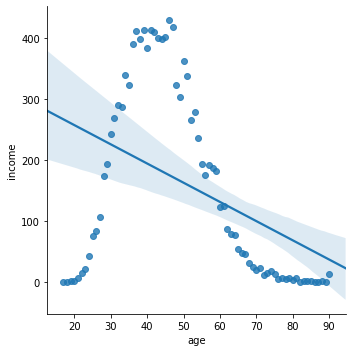

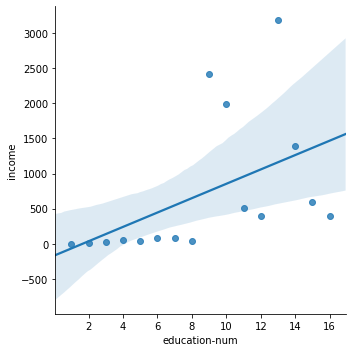

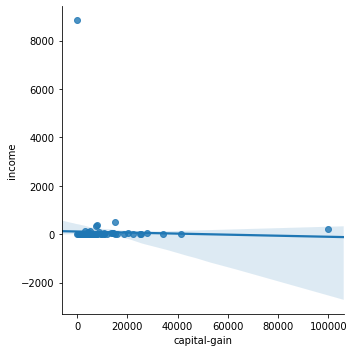

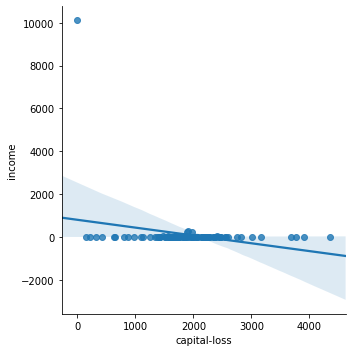

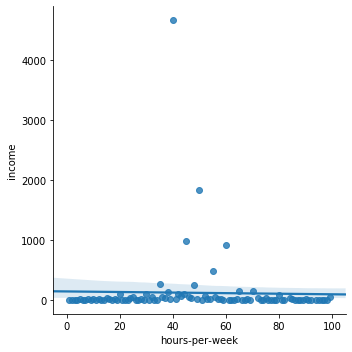

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_copy1 = data.copy()
data_copy1.loc[data_copy1.income == "<=50K","income"] = 0
data_copy1.loc[data_copy1.income == ">50K","income"] = 1

numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
#fig, axes = plt.subplots(1,5,figsize=(20, 5))
for index,column in enumerate(numerical):

    temp = data_copy1.groupby(column, as_index=False, observed=True)['income'].sum()
    #sns.scatterplot(x=column,y='income',ax=axes[index],data=temp)
    sns.lmplot(x=column,y='income', data=temp);


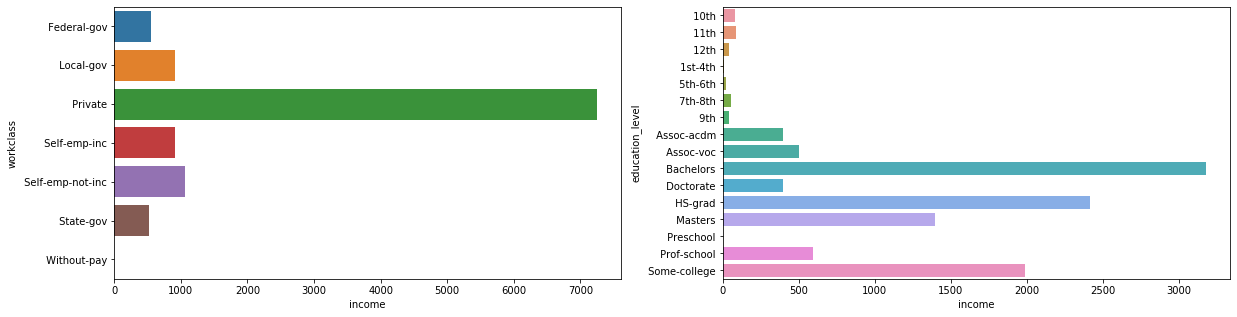

In [5]:
categorical = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
fig, axes = plt.subplots(1,2,figsize=(20, 5))

for index,column in enumerate(categorical[0:2]):
    temp = data_copy1.groupby(column, as_index=False, observed=True)['income'].sum()
    sns.barplot(y=column,x='income',ax=axes[index],data=temp)

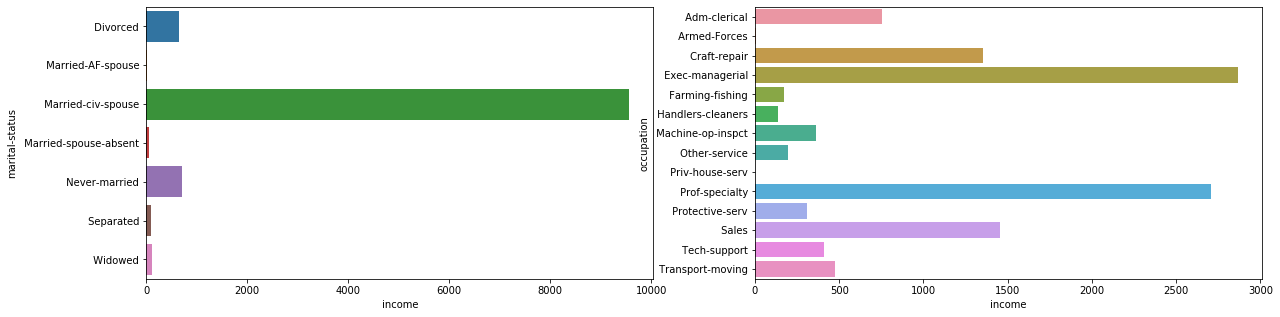

In [6]:
categorical = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
fig, axes = plt.subplots(1,2,figsize=(20, 5))

for index,column in enumerate(categorical[2:4]):
    temp = data_copy1.groupby(column, as_index=False, observed=True)['income'].sum()
    sns.barplot(y=column,x='income',ax=axes[index],data=temp)

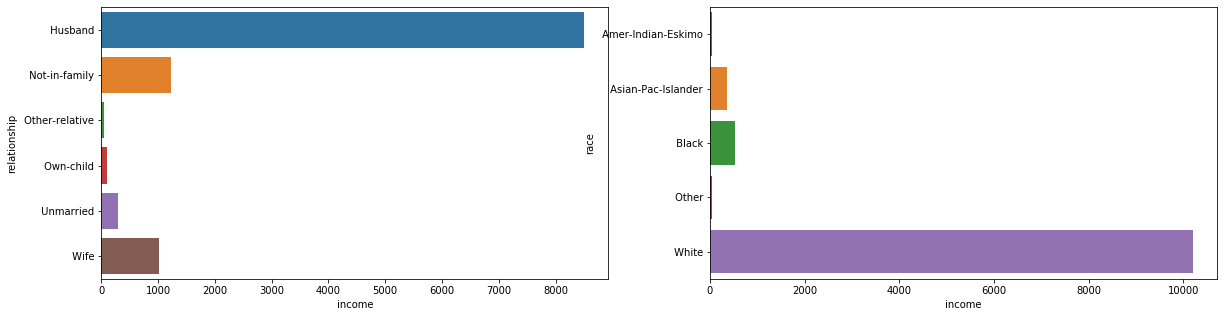

In [7]:
categorical = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
fig, axes = plt.subplots(1,2,figsize=(20, 5))

for index,column in enumerate(categorical[4:6]):
    temp = data_copy1.groupby(column, as_index=False, observed=True)['income'].sum()
    sns.barplot(y=column,x='income',ax=axes[index],data=temp)

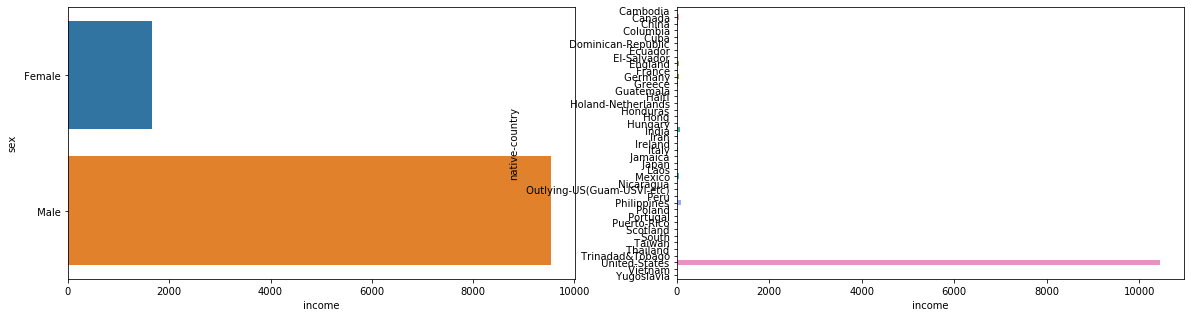

In [8]:
categorical = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
fig, axes = plt.subplots(1,2,figsize=(20, 5))

for index,column in enumerate(categorical[6:8]):
    temp = data_copy1.groupby(column, as_index=False, observed=True)['income'].sum()
    sns.barplot(y=column,x='income',ax=axes[index],data=temp)

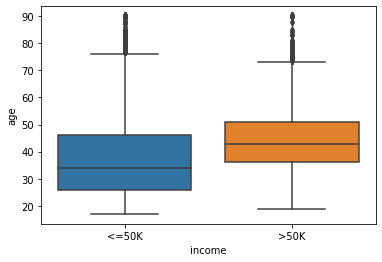

In [9]:
#plt.plot(data_copy1.age)
sns.boxplot(x="income", y="age", data=data)
#the plot indicates that higher age have more income 

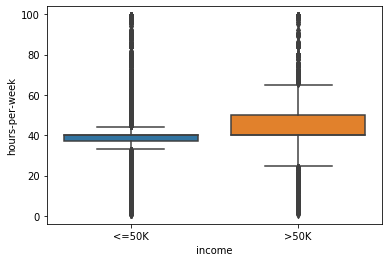

In [10]:
#plt.plot(data_copy1.age)
sns.boxplot(x="income", y="hours-per-week", data=data)
#the plot indicates that higher age have more income 

#####  Feature creation

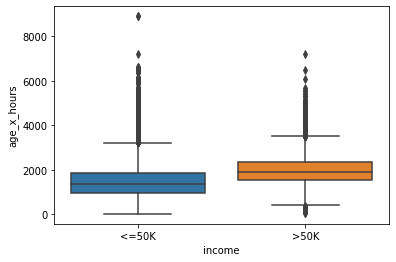

In [11]:
def _engineer_features(data):
    age_x_hours = data['age']*data['hours-per-week']
    data_copy2 = data.copy()
    data_copy2['age_x_hours'] = age_x_hours
    return data_copy2

sns.boxplot(x="income", y="age_x_hours", data=_engineer_features(data))

In [12]:
# correlation heat map between the x and y 
#data_copy1.iloc[:,:-1].shape #all except the last
#data_copy1.iloc[:,-1].shape #only the last
#data_copy1.head(10)
data_corr = data_copy1.copy()
data_corr.dtypes

for column in data_corr.columns:
    if data_corr[column].dtype == 'object':
        data_corr[column] = data_corr[column].astype('category').cat.codes 
        
data_corr.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


In [13]:
from sklearn import preprocessing
data_corr_scaled = preprocessing.scale(data_corr)
data_corr_scaled = pd.DataFrame(data_corr_scaled)
data_corr_scaled.columns = data_copy1.columns
data_corr_scaled.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.034201,2.917717,-0.344074,1.128753,0.942936,-1.482624,-0.258387,0.384110,0.693813,0.142888,-0.21878,-0.078120,0.262999,-0.574031
1,0.866417,1.873997,-0.344074,1.128753,-0.390005,-0.737534,-0.884479,0.384110,0.693813,-0.146733,-0.21878,-2.326738,0.262999,-0.574031
2,-0.041455,-0.213443,0.179902,-0.438122,-1.722946,-0.240806,-0.258387,0.384110,0.693813,-0.146733,-0.21878,-0.078120,0.262999,-0.574031
3,1.093385,-0.213443,-2.439977,-1.221559,-0.390005,-0.240806,-0.884479,-2.018744,0.693813,-0.146733,-0.21878,-0.078120,0.262999,-0.574031
4,-0.798015,-0.213443,-0.344074,1.128753,-0.390005,0.752648,2.245982,-2.018744,-1.441310,-0.146733,-0.21878,-0.078120,-5.329300,-0.574031


In [14]:
data_corr_scaled.corrwith(data_corr_scaled['income']).sort_values()

relationship      -0.253402
marital-status    -0.192711
workclass          0.015659
native-country     0.020103
occupation         0.049787
race               0.070844
education_level    0.081196
capital-loss       0.148687
sex                0.215760
capital-gain       0.221034
hours-per-week     0.227199
age                0.237040
education-num      0.332800
income             1.000000
dtype: float64

In [15]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income <= '>50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.4f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 45222
Percentage of individuals making more than $50,000: 24.7844%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 


C:\Users\Manjit\Desktop\Masters\1.Self-Courses\1.ML\Udacity\Intro-to-ML\projects\intro-to-ml-tensorflow-master\projects\p1_charityml\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


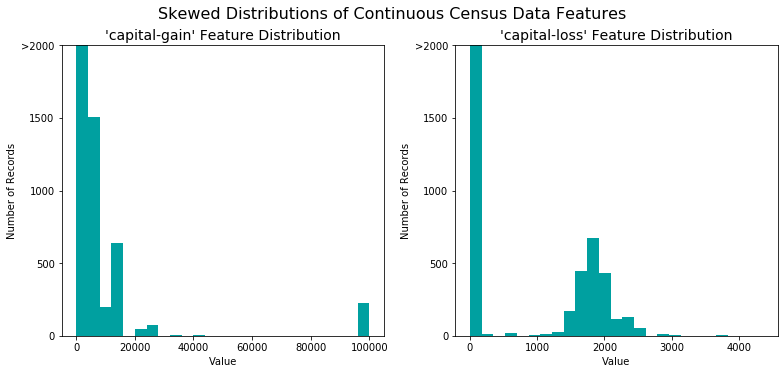

In [16]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

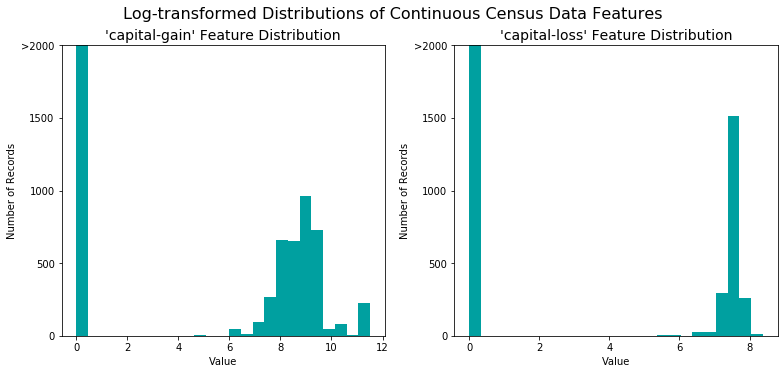

In [17]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.


In [18]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [19]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = np.ones(len(income_raw))
for i,j in enumerate(income_raw):
    if j == "<=50K":
        income[i] = 0

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.


In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [21]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall

accuracy = np.sum(income)/len(income)
recall = 1
precision = np.sum(income)/len(income)
beta = 0.5

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + beta**2)*((precision*recall)/((beta**2)*precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
#print(fscore,accuracy)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

We can use all the models for our classification problem of finding the donars. I will list Decision tree, SVM and Logistic regression.

Decision Tree
1. Very useful when we have a clear yes/no decision to make among the features, which is the case in our problem, when majority of the features are yes/no after the label encoding. Example, when we have to select a car with x,y,z features out of a-z features
2. we can get a good separation between the classes, which has the capability to fit complex boundary, it performs well when there arent too many yes/no questions at each node
3. when there are too many possibilities/features, and also to find the number of leaves at each level and tree depth is challenging and time consuming
4. our question is well structured so this suits the model

SVM
1. this works very well for small dataset and it is fast and efficient
2. the model creates a large margin classification, so the classes are well separated
3. finding the parameters C is challenging
4. the question does not have many features and too many points 

Logistic Regression
1. this can be used as a baseline model and works well for most problems 
2. intrepitbility of the model is easy, it performs well then the classes are not well separated
3. when there is clear separation between the classes it wont work well, also there is not feature selection and does not fit the complex functions
4. simplicity of the model, and easy explainability

all the above answers are virtue of my own understanding reading through books and material and i am writing it in my own words,
if it is incorrect please highlight it to me.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [22]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train,y_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test,y_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(predictions_train,y_train[:300], beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(predictions_test,y_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 361.77 samples.
DecisionTreeClassifier trained on 3617.7000000000003 samples.
DecisionTreeClassifier trained on 36177 samples.
GaussianNB trained on 361.77 samples.
GaussianNB trained on 3617.7000000000003 samples.
GaussianNB trained on 36177 samples.


C:\Users\Manjit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 361.77 samples.


C:\Users\Manjit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 3617.7000000000003 samples.


C:\Users\Manjit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 36177 samples.


C:\Users\Manjit\Desktop\Masters\1.Self-Courses\1.ML\Udacity\Intro-to-ML\projects\intro-to-ml-tensorflow-master\projects\p1_charityml\visuals.py:121: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


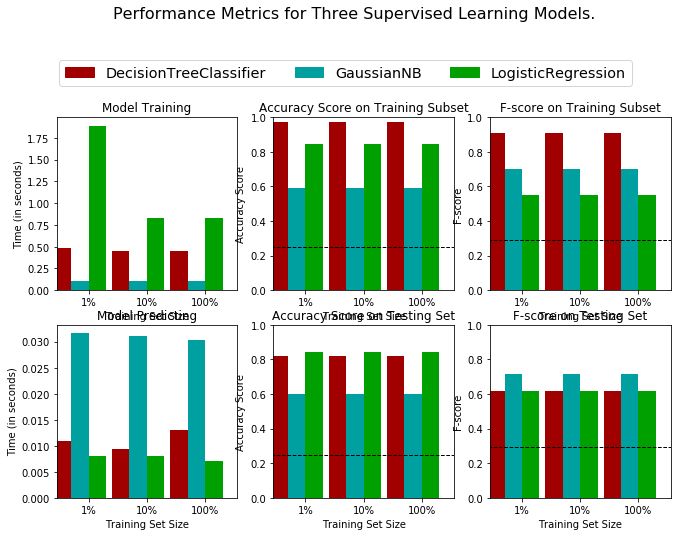

In [23]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = GaussianNB()
clf_C = LogisticRegression()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train)*.1
samples_1 = len(y_train)*.01

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [24]:
#best model
#trying out models outside the top3 above 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

clf_rf = RandomForestClassifier(max_depth=25, max_features=10,random_state=0).fit(X_train,y_train)
temp = train_predict(clf_rf, 1000, X_train, y_train, X_test, y_test)

temp

RandomForestClassifier trained on 1000 samples.


{'train_time': 5.271689176559448,
 'pred_time': 0.2618985176086426,
 'acc_train': 0.9433333333333334,
 'acc_test': 0.8587064676616916,
 'f_train': 0.830945558739255,
 'f_test': 0.6375648890986314}

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DA16530B8>],
      dtype=object)

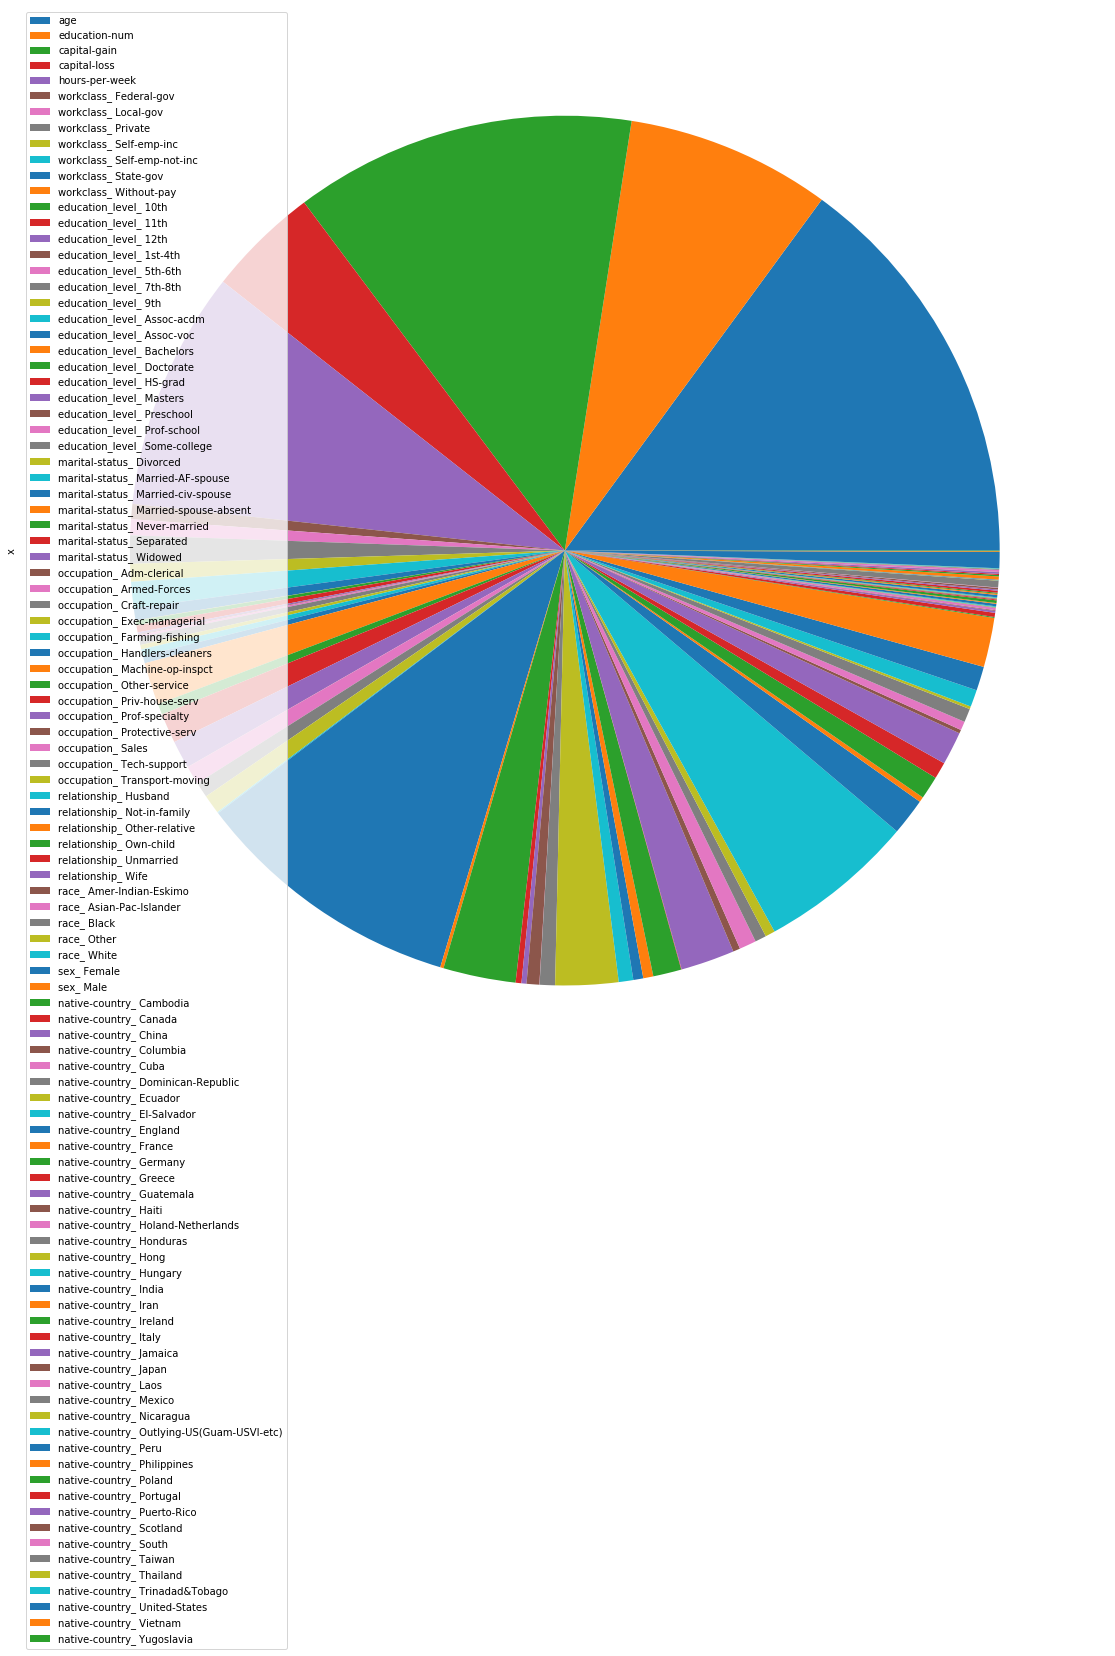

In [25]:
#visualizing the feature importance 

y_values = clf_rf.feature_importances_
x_values = X_train.columns
#sns.barplot(x=x_values, y=y_values)

temp_df = pd.DataFrame(y_values, index=x_values, columns=['x'])
temp_df.plot.pie(subplots=True, figsize=(31, 20),fontsize=20, labeldistance=None)

In [26]:
#let us investigate which are the predictions the model is getting wrong 

rf_prediction = clf_rf.predict(X_test)
X_test_copy1 = X_test.copy()
X_test_copy1['prediction'] = rf_prediction
X_test_copy1['actual'] = y_test
Prediction_Actual_differ = X_test_copy1[X_test_copy1.prediction != X_test_copy1.actual]
Prediction_Actual_differ.sort_index(inplace=True)
Prediction_Actual_differ.head()

C:\Users\Manjit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,prediction,actual
18,0.356164,0.866667,0.0,0.0,0.448980,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.0,1.0
62,0.493151,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.0,1.0
66,0.164384,0.800000,0.0,0.0,0.704082,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.0,1.0
83,0.547945,0.666667,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1.0,0.0
89,0.273973,0.600000,0.0,0.0,0.479592,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.0,1.0


In [27]:
print("Total Number of misclassification: ", len(Prediction_Actual_differ), "Percentage of misclassification: ",(len(Prediction_Actual_differ)/len(X_test))*100)

Total Number of misclassification:  1278 Percentage of misclassification:  14.129353233830846


In [28]:
temp = data.loc[Prediction_Actual_differ.index]
temp.sort_index(inplace=True)
temp.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18,43,Self-emp-not-inc,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,45.0,United-States,>50K
62,53,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
66,29,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,70.0,United-States,>50K
83,57,Private,Assoc-voc,11.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
89,37,Private,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,48.0,United-States,>50K


In [29]:
#all the data preprocessing 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)

def _preprocessing(data):
    income_raw = data['income']
    features_raw = data.drop('income', axis = 1)
    
    skewed = ['capital-gain', 'capital-loss']
    numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    
    features_log_transformed = pd.DataFrame(data = features_raw)
    features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
    
    features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
    features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
    features_final = pd.get_dummies(features_log_minmax_transform)

    income = np.ones(len(income_raw))
    for i,j in enumerate(income_raw):
        if j == "<=50K":
            income[i] = 0
    return [income, features_final]    
    

In [30]:
#after looking at the misclassification it appears that the model is not looking at age and hours of week together, so
#created a new feature to consider both together 

model_data = _engineer_features(data)
temp = _preprocessing(model_data)
income, feature_final = temp[0], temp[1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

clf_rf2 = RandomForestClassifier(max_depth=25,max_features=25 , random_state=0).fit(X_train2,y_train2)
train_predict(clf_rf, 1000, X_train2, y_train2, X_test2, y_test2)


RandomForestClassifier trained on 1000 samples.


{'train_time': 4.954700469970703,
 'pred_time': 0.2319037914276123,
 'acc_train': 0.9433333333333334,
 'acc_test': 0.8587064676616916,
 'f_train': 0.830945558739255,
 'f_test': 0.6375648890986314}

Random Forest: ROC AUC=0.7770


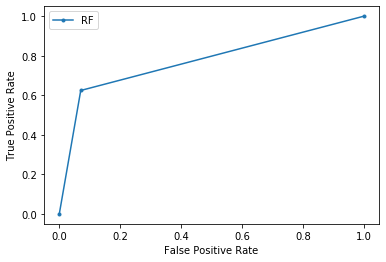

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_rf2_model = clf_rf2.fit(X_train2,y_train2)
clf_rf2_model_predict = clf_rf2_model.predict(X_test2)

fpr, tpr, _ = roc_curve(y_test2, clf_rf2_model_predict)
auc = roc_auc_score(y_test2, clf_rf2_model_predict)

print('Random Forest: ROC AUC=%.4f' % (auc))

plt.plot(fpr, tpr, marker='.', label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [32]:
#cross validation did not improve the results 

cv = KFold(n_splits=10)
clf_rf_cv = RandomForestClassifier()
kappa_score = []
confusion_matrix2 = []

model_data = _engineer_features(data)
temp = _preprocessing(model_data)
income, feature_final = temp[0], temp[1]

y_df = pd.DataFrame(income)

for train_index, test_index in cv.split(features_final):
    X = features_final
    clf_rf_cv.fit(X.iloc[train_index], y_df.iloc[train_index].values.flatten())
    ypred = clf_rf_cv.predict(X.iloc[test_index])
    
    kappa_score.append(cohen_kappa_score(y_df.iloc[test_index].values.flatten(), ypred))
    confusion_matrix2.append(confusion_matrix(y_df.iloc[test_index].values.flatten(), ypred))

In [33]:
results_cv = train_predict(clf_rf_cv, 1000, X_train2, y_train2, X_test2, y_test2)
results_cv

RandomForestClassifier trained on 1000 samples.


{'train_time': 5.761831521987915,
 'pred_time': 0.28707218170166016,
 'acc_train': 0.97,
 'acc_test': 0.8403537866224433,
 'f_train': 0.9154929577464789,
 'f_test': 0.6343179924067043}

Random Forest with CV: ROC AUC=0.7683


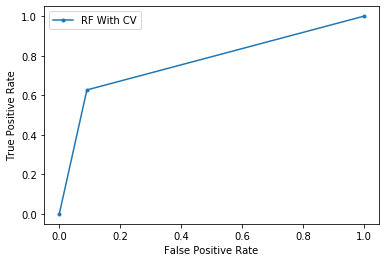

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_rf_cv_model = clf_rf_cv.fit(X_train2,y_train2)
clf_rf_cv_model_predict = clf_rf_cv_model.predict(X_test2)

fpr, tpr, _ = roc_curve(y_test2, clf_rf_cv_model_predict)
auc = roc_auc_score(y_test2, clf_rf_cv_model_predict)

print('Random Forest with CV: ROC AUC=%.4f' % (auc))

plt.plot(fpr, tpr, marker='.', label='RF With CV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [35]:
#using synthetic sampling had a significant improvement over the test 

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 9003
Before OverSampling, counts of label '0': 27174 



In [36]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


After OverSampling, the shape of train_X: (54348, 103)
After OverSampling, the shape of train_y: (54348,) 

After OverSampling, counts of label '1': 27174
After OverSampling, counts of label '0': 27174


In [37]:
clf_rf3 = RandomForestClassifier(max_depth=25,max_features=25 , random_state=0)
results_smote = train_predict(clf_rf3, 1000, X_train_res, y_train_res, X_test, y_test)
results_smote

RandomForestClassifier trained on 1000 samples.


{'train_time': 13.793994426727295,
 'pred_time': 0.242964506149292,
 'acc_train': 0.9333333333333333,
 'acc_test': 0.8273079049198452,
 'f_train': 0.9139784946236559,
 'f_test': 0.7520307823856349}

Random Forest with SMOTE: ROC AUC=0.8173


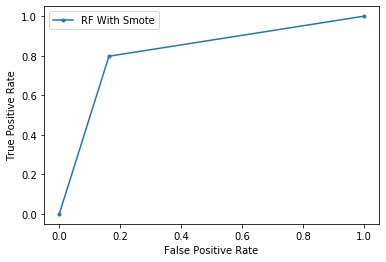

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_rf3_model = clf_rf3.fit(X_train_res,y_train_res)
clf_rf3_model_predict = clf_rf3_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, clf_rf3_model_predict)
auc = roc_auc_score(y_test, clf_rf3_model_predict)

print('Random Forest with SMOTE: ROC AUC=%.4f' % (auc))

plt.plot(fpr, tpr, marker='.', label='RF With Smote')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 


Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
Random Forest

Random forest is a special case of Decision Tree, it has the highest F score on the test data.
The model does very well on the training data, overfit is handled due to the random selection of features and does a good job on the test data as well.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

When explaining your model, if using external resources please include all citations.

**Answer: ** 
Random forest is a decision tree model, where we select random features out of the available collection and then build a decision tree, using yes/no options. Choosing random features may sound counter intuitive but this does a very good job of predicting the target variable and reduces the variance on the test data.

The Model that works well for the given case is Random Forest. Random forest is a decision tree based model.
Decision tree is one of the way to represent all the possibilities.

Example:

![title](tree.jpg)

Here, The activity that we like to do depends on whether it will rain today or not, so we have placed rain as the **Root** of the Decision Tree and depending on the whether it rains or not, our actions will be the **leaves** (bottom nodes). Here the leaves themselves can become root of futher subtree and this can extend further below. 

The Decision Tree models works in the same way, with a catch.
Here we need to decide which decisions have to be made as root in relation to the target, which is to classify whether the person has an income more than 50K or not. 

Example:
we consider 3 attributes Age, Gender and Education.
we decide which one of the attributes best indentifies the income better using a concept called information gain and that becomes root of the decision tree, after that we keep building tree until we exhaust all the features or depending upon threshold set up. This way we are able to separate all the candidates into relevant categories.

We need to decide, to what level we want to build the tree and how many leaves need to be present, otherwise we may be overfitting the data to the model which will lead to bad performance on real data. we identify the tree depth, and max leaves per node using a technique called as cross-validation and hyper parameter tuning.

The modeling process is basically to look at the features, find the information gain, build a tree and use the final tree to classify the input.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [39]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the classifier
clf = RandomForestClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'max_depth':[24,25,30], 'random_state':[0]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8436
F-score on testing data: 0.6840

Optimized Model
------
Final accuracy score on the testing data: 0.8591
Final F-score on the testing data: 0.7275


In [40]:
def _preprocessing2(test_data):
    features_raw = test_data    
    skewed = ['capital-gain', 'capital-loss']
    numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    
    features_log_transformed = pd.DataFrame(data = features_raw)
    features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
    
    features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
    features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
    features_final = pd.get_dummies(features_log_minmax_transform)

    return features_final

In [41]:
#test_data = test_data.drop('Unnamed: 0',axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)

model_data = _engineer_features(test_data)
model_data_final = _preprocessing2(model_data)

#test_data_predictions = best_clf.predict(model_data_final)

In [42]:
#test_data.head()

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.8427           |  0.8591         |
| F-score        |  0.6820           |  0.7275         |


**Answer: **

The optimization does improve the model.
The naive predictor has an accuracy of 24% compared to 86% of the built model.
Since the naive predictor is not learning from the data the low accuracy is attributed to the approach.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

I have indentified the top 5 features by looking at the correlation matrix.

Here correlation means how closely is the target variable related to the predictor variables, higher the correlation means the predictor predicts the target well.


>> **features**: education-num, age, hours-per-week, capital-gain, sex, relationship

As we observe from above, education is the most important feature. A person with better education is able to make good career and financial choices hence is able to make more income, which is consistent with common knowledge.

Likewise, age feature indicates that higher the age more income, which relates well with common idea which means more experienced people earn more.

Sex and Relationship features are little surprising, it highlights that males predominantly earn more than females and family people tend to earn more than single persons.


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

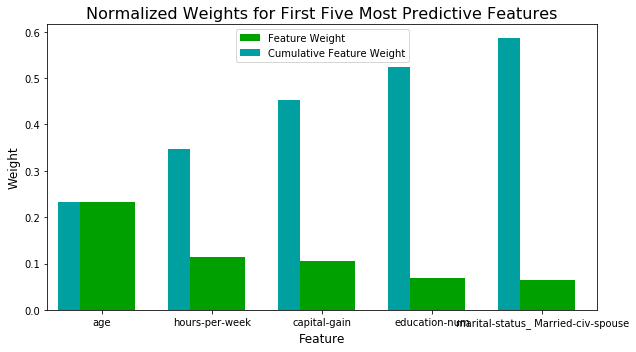

In [43]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
The features I noticed using correlation are the same from the feature importance, but with a slightly different order.
The visualization above does not show relationship which is strongly correlated but its is negative.

education-num, age, hours-per-week, capital-gain, sex, relationship
1. education
2. age 
3. hours-per-week
4. capital-gain
5. sex

from the model
1. age
2. hours-per-week
3. capital-gain
4. education
5. married

the model gives slightly different order which is down to interaction between the features and that random forest choose random subset of features that explain the data best, which need not always be well correlated.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [44]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8591
F-score on testing data: 0.7275

Final Model trained on reduced data
------
Accuracy on testing data: 0.8357
F-score on testing data: 0.6684


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
The model on reduced data is slighlty worse compared to the model using full data